# Assignment 3 - Reinforcement Learning

Group Name: AG 13

Student Name (Student ID):

1. Zhao Yufan (A0255971U)

2. Nayanthara Prathap Menon (A0261939R)

3. Valeriy Ivanov (A0228607B)

## GridWorlds

This assignment involves finding optimal policies for two grid worlds (CliffWalking and WindyGridWorld) using SARSA and Q learning. Details about WindyGridWorld (Example 6.5) and CliffWalking (Example 6.6) can be found in the following link.
    
    http://incompleteideas.net/book/RLbook2020.pdf


You need gym (version 0.18) and numpy (version 1.20.1) for this assignment. The environment for both problems are provided. 

For Windy Grid World environemnt you also need the file 'WindyGridWorld.py'. 

### Task 1: Learning [5 Marks]

You only need to write the codes for SARSA and Q-learning algorithms. Then do the learning in both 'CliffWalking' and 'Windy Grid World' environments. 

### Task 2: Analysis [5 Marks]   

1. Calculate the average return across the episodes. It gives you a measure of the performance of the algorithm while learning.  

2. Calculate the return after convergence. It gives you a measure of the performance after the learning is completed. 

3. What do you observe from these results?

Install the necessary packages

In [28]:
#!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple gym==0.21.0
#above line installs gym v0.21.0 instead of the current v0.26.0
#v0.26.0 breaks many things (matplotlib, rendering, windyworld environment, env.reset(), and possibly more...)
#!pip install numpy
#!pip install tqdm
#!pip install pygame

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached gym-0.21.0-py3-none-any.whl
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/cf/26/cd6c4177273ee35f7a31245893489c68bc340988f12ca315b392f1f18a93/cloudpickle-2.2.0-py3-none-any.whl (25 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/af/74/c02ece94ef88bed0a7f266959fd9bb2c97140345bc792f281b7db390eea9/numpy-1.23.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.0.0
    Uninstalling cloudpickle-2.0.0:
      Successfully uninstalled cloudpickle-2.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# Task 1: Learning
## Task 1a: Learning in CliffWalking Environment

### Environment for CliffWalking

The board is a 4x12 matrix, with (using NumPy matrix indexing):
    [3, 0] as the start at bottom-left
    [3, 11] as the goal at bottom-right
    [3, 1..10] as the cliff at bottom-center

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
and a reset to the start. If an action would take you off the grid, you remain in the previous state.
An episode terminates when the agent reaches the goal.


In [81]:
import gym
import numpy as np
from tqdm import tqdm 
import time

env = gym.make('CliffWalking-v0')
env.reset()

36

In [82]:
num_actions = env.action_space.n 
num_states = env.observation_space.n 


num_episodes = 1000
lr = 0.81
epsilon = 0.1
gamma = 0.96


Q = [[0 for i in range(env.action_space.n)] for j in range(env.observation_space.n)]
print("Number of actions: ", num_actions)
print("Number of states: ", num_states)
print('\n')

Number of actions:  4
Number of states:  48




In [83]:
# Initialize Q function - a simplified version is used here 
# in reality the number of states may be unknown and all states may not be reachable 

# hint: use num_states as the key to a dictionary of lists
Q = [[0 for i in range(env.action_space.n)] for j in range(env.observation_space.n)]

In [84]:
def behavioral_policy(state, Q, e):
    
    
    # Implement the epsilon-greedy policy
    # Don't forget the epsilon-greedy idea
    # no idea what the skeleton code is doing. Implemented behavioral_policy my own way
        
        
    best_action = Q[state].index(max(Q[state]))
    #probs[best_action] += 
    if np.random.uniform(0,1) < e:
        action = np.random.randint(0 , num_actions)
    else:
        action = best_action

    return action

### SARSA Learning 

In [85]:
def sarsa(env, Q, num_actions, num_episodes, epsilon, lr):    
    
    def behavioral_policy(state, Q, e):
        # Implement the epsilon-greedy policy
        # Don't forget the epsilon-greedy idea
        #probs =  
        best_action = Q[state].index(max(Q[state]))
        #probs[best_action] += 
        if np.random.uniform(0,1) < e:
            action = np.random.randint(0 , num_actions)
        else:
            action = best_action
        
        return action
    
    def learn(state1 , state2 , reward , action1, action2):
        predict = Q[state1][action1]
        target = reward + gamma*Q[state2][action2]
        update = Q[state1][action1] + lr*(target-predict)
        return update
    
    counter = 0
    episode_length = [0] * num_episodes
    total_reward_episode = [0] * num_episodes
    
    for episode in tqdm(range(num_episodes)):
        done = False
        env.reset()
        #print("starting episode: ", counter)
        counter = counter + 1
        s = env.reset()
        action1 = behavioral_policy(s, Q, epsilon)
        while done is False:
            

            
            next_state, reward, terminated , info = env.step(action1)
            action2 = behavioral_policy(next_state , Q , epsilon)        
            
            Q[s][action1] = learn(s , next_state, reward, action1, action2)
            
            
            action1 = action2
            s = next_state
            
            episode_length[episode] += 1
            total_reward_episode[episode] += reward
            
            done = terminated


    policy = {}
    for i in range(len(Q)):
        policy[i] = Q[i].index(max(Q[i]))
    
    return Q, policy, {"rewards": total_reward_episode, "length": episode_length}
    


In [86]:
# Run SARSA
optimal_sarsa_Qcliff, sarsa_optimal_policycliff, sarsa_infocliff = sarsa(env, Q, num_actions, num_episodes, epsilon, lr)
print("\nGridWorld SARSA Optimal policy: \n", sarsa_optimal_policycliff)

100%|██████████| 1000/1000 [00:01<00:00, 717.63it/s]


GridWorld SARSA Optimal policy: 
 {0: 2, 1: 2, 2: 3, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 2, 9: 2, 10: 3, 11: 3, 12: 2, 13: 1, 14: 1, 15: 1, 16: 0, 17: 1, 18: 1, 19: 0, 20: 2, 21: 1, 22: 2, 23: 2, 24: 1, 25: 0, 26: 0, 27: 0, 28: 3, 29: 0, 30: 1, 31: 0, 32: 1, 33: 0, 34: 1, 35: 2, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0}


### Q-Learning

In [87]:
def q_learning(env, Q, num_actions, num_episodes, epsilon, lr):
    # Given to students

    
    def behavioral_policy(state, Q, e):
        # Implement the epsilon-greedy policy
        # Don't forget the epsilon-greedy idea
        #probs =  
        best_action = Q[state].index(max(Q[state]))
        #probs[best_action] += 
        if np.random.uniform(0,1) < e:
            action = np.random.randint(0 , num_actions)
        else:
            action = best_action
        return action
    
    def learn(state1, state2, reward, action):
        predict = Q[state1][action]
        target = reward + gamma * max(Q[state2])
        update = Q[state1][action] = Q[state1][action] + lr * (target - predict)
        return update
    
    counter = 0
    episode_length = [0] * num_episodes
    total_reward_episode = [0] * num_episodes
            
    for episode in tqdm(range(num_episodes)):
        
        done = False
        env.reset()
        #print("starting episode: ", counter)
        counter = counter + 1
        state = env.reset()
        
        done = False

        while done is False:
            
            action = behavioral_policy(state , Q , epsilon)
            next_state, reward, terminated, info = env.step(action)
            Q[state][action] = learn(state , next_state , reward , action)
            
            state = next_state
                        
            total_reward_episode[episode] += reward
            episode_length[episode] += 1
            
            done = terminated
            
    policy = {}
    for i in range(len(Q)):
        policy[i] = Q[i].index(max(Q[i]))

    return Q, policy, {"rewards": total_reward_episode, "length": episode_length}

In [88]:
#Q has been changed by running SARSA-learning
#reset Q before running Q-learning

Q = [[0 for i in range(env.action_space.n)] for j in range(env.observation_space.n)]

optimal_Qcliff, q_optimal_policycliff, q_infocliff = q_learning(env, Q, num_actions, num_episodes, epsilon, lr)
print("\nGridWorld Q-Learning Optimal policy: \n", q_optimal_policycliff)

100%|██████████| 1000/1000 [00:00<00:00, 2570.77it/s]


GridWorld Q-Learning Optimal policy: 
 {0: 1, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 1, 7: 2, 8: 2, 9: 1, 10: 1, 11: 2, 12: 2, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 2, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0}


In [89]:
# run this cell if you do not have the matplotlib library

#from PIL import Image
#import PIL
#!pip install matplotlib --user
import matplotlib.pyplot as plt


In [90]:
def plot_rate(episode_length, total_reward_episode, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(episode_length)
    ax[0].set_title("Episode Length over time")
    ax[0].set(xlabel="Episode", ylabel="Length")
    ax[1].plot(total_reward_episode)
    ax[1].set_title("Episode reward over time")
    ax[1].set(xlabel="Episode reward over time", ylabel="Reward")
    fig.suptitle(title)

    plt.show()

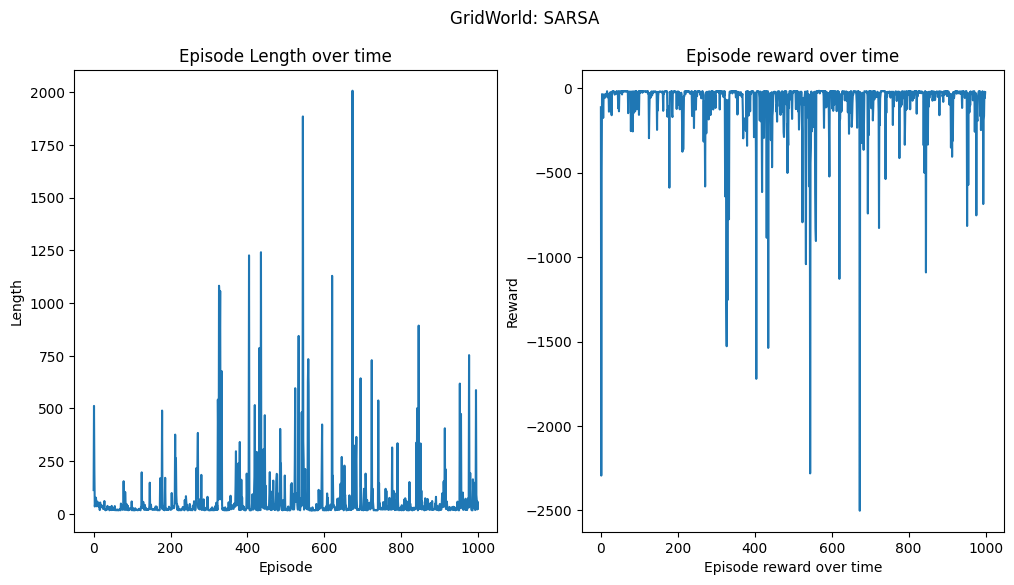

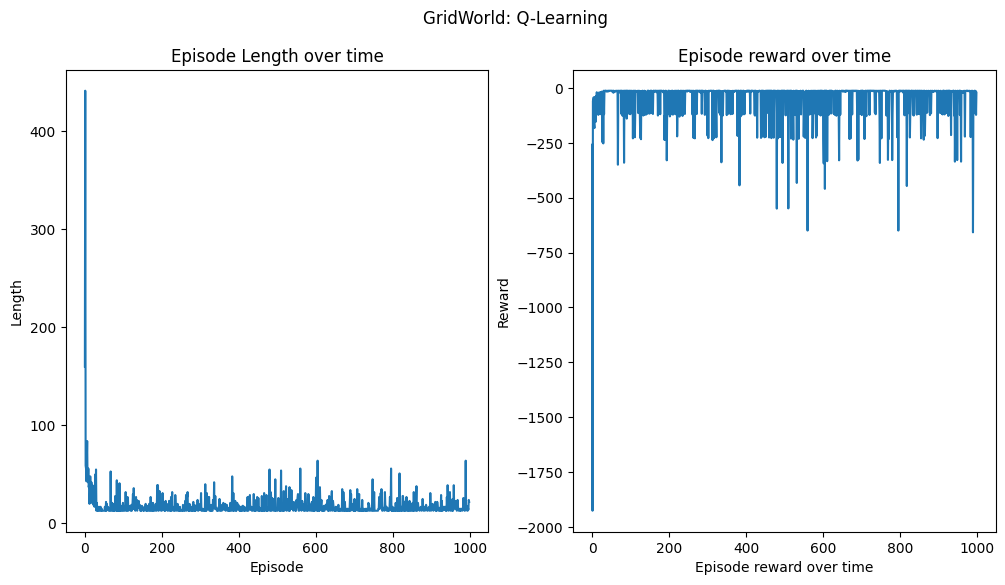

In [91]:
plot_rate(sarsa_infocliff["length"], sarsa_infocliff["rewards"], "GridWorld: SARSA")
plot_rate(q_infocliff["length"], q_infocliff["rewards"], "GridWorld: Q-Learning")

## Task 1b: Learning in Windy Grid world

WindyGridWorld is similar to GridWorld, but with a few differences. You only need to move to the target state. But this time there is a cross-wind across the center of the grid that will push you upwards. In columns 3, 4, 5, and 8 there are winds of strength 1 while in column 6 and 7 there are winds of strength 2. For more details refer Example 6.5 in

 http://incompleteideas.net/book/RLbook2020.pdf

 You only need to change the environment and reuse the SARSA and Q-learning algorithms. 

In [92]:
#Windy Grid World environment
from WindyGridWorld import WindyGridWorld
env = WindyGridWorld()
env.reset()
env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



In [93]:
num_actions = env.action_space.n 
num_states = env.observation_space.n 

print("Number of actions: ", num_actions)
print("Number of states: ", num_states)

Number of actions:  4
Number of states:  70


Play around with different learning rates epsilons, and Q initializations to see what is best.

In [94]:
num_episodes = 1000
lr = 0.81
epsilon = 0.1
gamma = 0.96

In [95]:
# Initialize Q function - a simplified version is used here 
# in reality the number of states may be unknown and all states may not be reachable 

# hint: use num_states as the key to a dictionary of lists
Q = Q = [[0 for i in range(env.action_space.n)] for j in range(env.observation_space.n)]

In [96]:
optimal_sarsa_Qwindy, sarsa_optimal_policywindy, sarsa_infowindy = sarsa(env, Q, num_actions, num_episodes, epsilon, lr)
print("\n WindyGridWorld SARSA Optimal policy: \n", sarsa_optimal_policywindy)

100%|██████████| 1000/1000 [00:00<00:00, 1778.30it/s]


 WindyGridWorld SARSA Optimal policy: 
 {0: 3, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1, 16: 0, 17: 2, 18: 1, 19: 2, 20: 1, 21: 1, 22: 2, 23: 3, 24: 1, 25: 1, 26: 2, 27: 0, 28: 3, 29: 2, 30: 1, 31: 2, 32: 1, 33: 1, 34: 1, 35: 0, 36: 1, 37: 0, 38: 3, 39: 2, 40: 2, 41: 1, 42: 2, 43: 1, 44: 0, 45: 1, 46: 0, 47: 2, 48: 3, 49: 3, 50: 2, 51: 1, 52: 2, 53: 1, 54: 1, 55: 0, 56: 0, 57: 2, 58: 3, 59: 2, 60: 1, 61: 0, 62: 1, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 3}


In [97]:
optimal_Qwindy, q_optimal_policywindy, q_infowindy = q_learning(env, Q, num_actions, num_episodes, epsilon, lr)
print("\n WindyGridWorld Q-Learning Optimal policy: \n", q_optimal_policywindy)

100%|██████████| 1000/1000 [00:00<00:00, 2793.31it/s]


 WindyGridWorld Q-Learning Optimal policy: 
 {0: 3, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1, 16: 0, 17: 2, 18: 1, 19: 2, 20: 1, 21: 1, 22: 2, 23: 3, 24: 1, 25: 1, 26: 2, 27: 1, 28: 1, 29: 2, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 0, 36: 1, 37: 0, 38: 3, 39: 2, 40: 1, 41: 0, 42: 0, 43: 1, 44: 0, 45: 1, 46: 0, 47: 2, 48: 3, 49: 3, 50: 2, 51: 1, 52: 2, 53: 1, 54: 1, 55: 0, 56: 0, 57: 2, 58: 3, 59: 2, 60: 1, 61: 1, 62: 1, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 3}


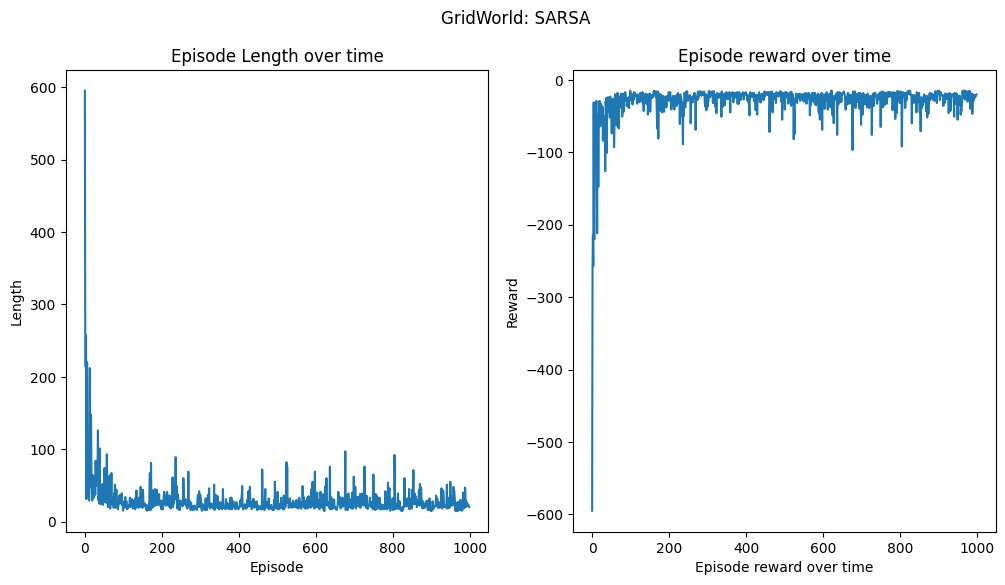

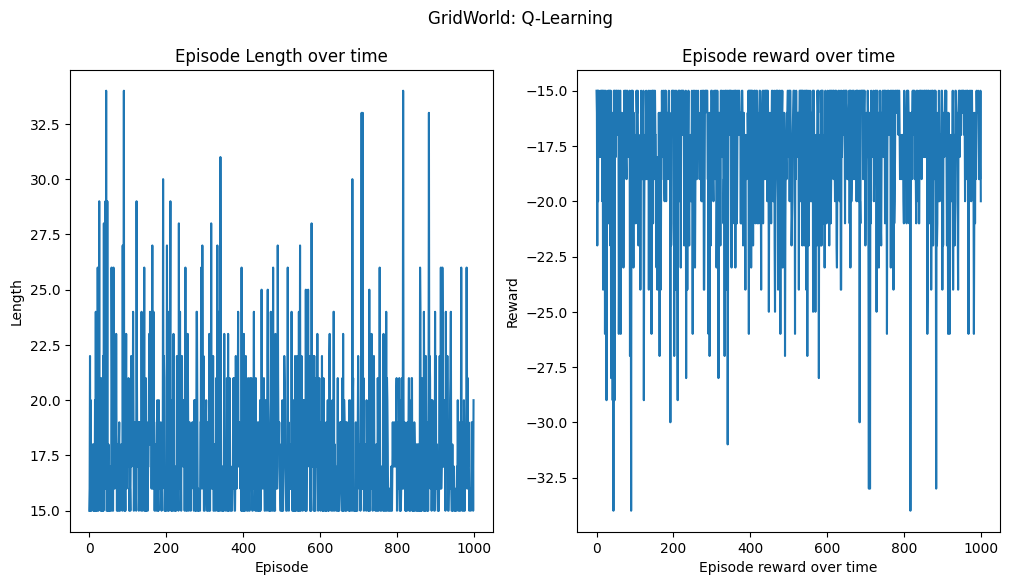

In [98]:
plot_rate(sarsa_infowindy["length"], sarsa_infowindy["rewards"], "GridWorld: SARSA")
plot_rate(q_infowindy["length"], q_infowindy["rewards"], "GridWorld: Q-Learning")

# Task 2: Analysis (Comparison of Q-learning and SARSA learning algorithms)

1. Comment on the number of episodes required to converge to the optimal policy for both environments. 
       
2. Discuss the differences in the reward graphs.  

3. Calculate the average return across the episodes for each environment. It gives a measure of the performance of the algorithm while learning (i.e., online performance).  

4. Calculate the return after convergence. It gives you a measure of the performance after the learning is completed (i.e., offline performance). 

5. Briefly summarize your results.
 
 It is advisable to rerun the algorithm a few times to get a clearer understanding of the algorithms.

1. Number of episodes required to converge to the optimal policy for both environments.

Since the policy directly affects moves made at each state, we can simply look at the episode length (1 data point per episode) instead of the entire policy (48 data points per episode) to know how long it took to converge to the optimal policy.

For the cliff walking environment, this was roughly 30 episodes for SARSA learning, and also 30 episodes for Q-learning. These were found from a graph plotted by learning with only 50 episodes. However, from the plot above with 1000 episodes, SARSA learning has a lot of variance. There were still some episodes over 1000 steps in length after 900 episodes. Q learning was a lot better, with all episodes under 100 steps in length after 30 iterations.

For the windy grid environment, both SARSA learning and Q-learning coverged in about 10 episodes. These were also found from a graph plotted by learning with only 50 episodes. However, from the plot above with 1000 episodes, SARSA learning also had more variance than Q-learning. For SARSA learning, there was one episode that took about 100 moves after 900 episodes of training. This is compared to Q-learning, where every episode took less than 35 moves after 200 episodes.

2. Discuss the differences in the reward graphs.

In the cliffwalking environment, due to the variance in the episode length and policy, we see that the reward graph also has a lot of variance in terms of steps in each episode. There is less variance in Q learning.

In the windy grid environment, the reward graphs for SARSA learning still has more variance than Q-learning. However, both graphs have less variance when compared to the cliffwalking environment. This might be because the wind always pushes the agent upwards, which moves the agent closer to the optimal path. Hence, many suboptimal moves are now optimal, such as trying to move downwards in the wind stream.

To illustrate the point, we calculate the variances precisely:


In [99]:
SARSAcliffsum = 0
for i in sarsa_infocliff['rewards']:
    SARSAcliffsum = SARSAcliffsum + (int(i) - averageRewardsarsacliff)**2
SARSAcliffvariance = SARSAcliffsum/(num_episodes-1)


qcliffsum = 0
for i in q_infocliff['rewards']:
    qcliffsum = qcliffsum + (int(i) - averageRewardqcliff)**2
qcliffvariance = qcliffsum/(num_episodes-1)

SARSAwindysum = 0
for i in sarsa_infowindy['rewards']:
    SARSAwindysum = SARSAwindysum + (int(i) - averageRewardsarsawindy)**2
SARSAwindyvariance = SARSAwindysum/(num_episodes-1)

qwindysum = 0
for i in q_infowindy['rewards']:
    qwindysum = qwindysum + (int(i) - averageRewardqwindy)**2
qwindyvariance = qwindysum/(num_episodes-1)

print('Variance for Cliff walking environment for rewards while learning with SARSA learning is is:' , SARSAcliffvariance)
print('Variance for Cliff walking environment for rewards while learning with Q learning is is:' , qcliffvariance)
print('Variance for windy environment for rewards while learning with SARSA learning is is:' , SARSAwindyvariance)
print('Variance for windy environment for rewards while learning with Q learning is is:' , qwindyvariance)

Variance for Cliff walking environment for rewards while learning with SARSA learning is is: 42669.03655655664
Variance for Cliff walking environment for rewards while learning with Q learning is is: 10529.927759759745
Variance for windy environment for rewards while learning with SARSA learning is is: 749.3831831831743
Variance for windy environment for rewards while learning with Q learning is is: 10.800896896896937


The variance for SARSA learning is indeed higher than Q learning in both environments, agreeing with our observations.

3. Calculate the average return across the episodes for each environment. It gives a measure of the performance of the algorithm while learning (i.e., online performance).  

Cliff Walking: sarsa_infocliff["length"], sarsa_infocliff["rewards"]

In [100]:
rewardSum = 0
for i in sarsa_infocliff['rewards']:
    rewardSum = rewardSum + int(i)

averageRewardsarsacliff = rewardSum / 1000
print('Average reward per episode for Cliff walking environment for SARSA learning is:' , averageRewardsarsacliff)

rewardSum2 = 0
for i in q_infocliff['rewards']:
    rewardSum2 = rewardSum2 + int(i)

averageRewardqcliff = rewardSum2 / 1000
print('Average reward per episode for Cliff walking environment for Q-learning is:' , averageRewardqcliff)

rewardSum3 = 0
for i in sarsa_infowindy['rewards']:
    rewardSum3 = rewardSum3 + int(i)

averageRewardsarsawindy = rewardSum3 / 1000
print('Average reward per episode for Windy grid environment for SARSA learning is:' , averageRewardsarsawindy)
rewardSum4 = 0

for i in q_infowindy['rewards']:
    rewardSum4 = rewardSum4 + int(i)

averageRewardqwindy = rewardSum4 / 1000
print('Average reward per episode for Windy grid environment for Q-learning is:' , averageRewardqwindy)

Average reward per episode for Cliff walking environment for SARSA learning is: -89.287
Average reward per episode for Cliff walking environment for Q-learning is: -55.203
Average reward per episode for Windy grid environment for SARSA learning is: -29.047
Average reward per episode for Windy grid environment for Q-learning is: -17.798


We now compute the variance in average rewards per episode for both environments and for both learning algorithms:

4. Calculate the return after convergence. It gives you a measure of the performance after the learning is completed (i.e., offline performance). cliff: 30 windy grid: 10


In [101]:
rewardSum = 0
for i in sarsa_infocliff['rewards'][30:]:
    rewardSum = rewardSum + int(i)

averageReward = rewardSum / 1000
print('Average reward per episode for Cliff walking environment for SARSA learning after convergence is:' , averageReward)

rewardSum2 = 0
for i in q_infocliff['rewards'][30:]:
    rewardSum2 = rewardSum2 + int(i)

averageReward = rewardSum2 / 1000
print('Average reward per episode for Cliff walking environment for Q-learning after convergence is:' , averageReward)

rewardSum3 = 0
for i in sarsa_infowindy['rewards'][10:]:
    rewardSum3 = rewardSum3 + int(i)

averageReward = rewardSum3 / 1000
print('Average reward per episode for Windy grid environment for SARSA learning after convergence is:' , averageReward)
rewardSum4 = 0

for i in q_infowindy['rewards'][10:]:
    rewardSum4 = rewardSum4 + int(i)

averageReward = rewardSum4 / 1000
print('Average reward per episode for Windy grid environment for Q-learning after convergence is:' , averageReward)


Average reward per episode for Cliff walking environment for SARSA learning after convergence is: -84.896
Average reward per episode for Cliff walking environment for Q-learning after convergence is: -51.059
Average reward per episode for Windy grid environment for SARSA learning after convergence is: -27.089
Average reward per episode for Windy grid environment for Q-learning after convergence is: -17.628


The word "convergence" here was taken to mean that "The rewards of each episode tends towards a certain number X, after a certain number of episodes N, most episodes (not all, due to the stochastic component when choosing moves) will have rewards in the range X-$\epsilon$ to X+$\epsilon$, for some value $\epsilon$ that decreases as N increases." 

The fact that rewards (and hence the policy) converge at all as we go through more episodes is a non-trivial fact that deserves further investigation. This was roughly explained on page 564 of AIMA4e, but having implemented a specific example, we can go into further detail now. We begin with some definitions:

$\textbf{Definition 1: (Metric Space)}$ 

Let $X$ be a set. A function $d:X \times X \rightarrow \mathbb{R}_{0}^{+}$ is called a $\textbf{metric}$ on $X$ if it fulfills the following properties for all $x,y,z \in X:$

(i) $d(x,y) = 0 \iff x = y$

(ii) $d(x,y) = d(y,x)$ (symmetry)

(iii) $d(x,y) \leq  d(x,z) + d(z,y)$ (triangle inequality)

$X$ is called a $\textbf{metric space}$ if there exists a metric function $d$ on $X$, and we write it as $(X,d)$.

$(X,d)$ is called a $\textbf{complete metric space}$ if every convergent sequence in $X$ converges to a point also in $X$. For example, the real numbers is complete, but the rational numbers are not. We can have a sequence:

$1, 1.4, 1.41 , 1.414, 1.4142, 1.41421, 1.414213, 1.4142135, 1.41421356, ...$

where every term has a fixed number of decimal points and therefore rational, but converges to $\sqrt2$, which is irrational.

Now, we let $X_s$ be the space of utility values for a particular state $s$. An element of $X_s$ is a vector $(ua_0, ua_1, ua_2, ua_3)$ where each $ua_i$ is the utility value of taking action $i$ at state $a$. Equip $X_s$ with the max-norm metric. i.e. $d((ua_0, ua_1, ua_2, ua_3), (0,0,0,0)) = max(ua_0, ua_1, ua_2, ua_3)$.

In the context of our problem, this norm is the utility value of the action of the best move at state $s$, and it will be chosen with probability $1-\epsilon$ in our behaviour policy whenever the agent reaches state $s$. The maxnorm metric was chosen due to the definition of the Bellman equations. It can be easily verified that this metric function satisfies all 3 axioms above.

Next, we introduce the Banach Fixed Point theorem:

$\textbf{Theorem 2: (Banach Fixed Point Theorem)}$ 

Let $(X,d)$ be a complete metric space. Then a map $T:X \rightarrow X$ is called a contraction mapping on X if there exists $q\in[0,1)$ such that:

$d(T(x),T(y)) \leq qd(x,y)$

for all $x,y \in X$. (also defined in AIMA4e page 564).

Banach Fixed point Theorem says that the map $T$ has a unique fixed point $x^*$ in $X$.

The proof of this theorem uses results from real analysis, and so we will only include a rough sketch here. To find the fixed point, we can begin with an arbitrary element $x_0 \in X$. We apply the map $T$ iteratively on $x_0$ to obtain a sequence of values:

$$x_0,x_1,x_2,x_3,x_4,...$$

An inductive argument will show that $d(x_n,x_{n+1}) \leq q^n d(x_0,x_1)$. This means that for any arbitrarily small value $\epsilon > 0$, we can always find a cut-off point in the sequence where, beyond that point, any two successive terms have norm-difference less than $\epsilon$. In real analysis, a sequence with this property is called a Cauchy Sequence. Another result in real analysis says that, in a complete metric space $X$, Cauchy Sequences always converge to a point in $X$.

Next, the fixed point must be unique. Indeed, if we have two points $a,b \in X$ that are both fixed points, then applying the map $T$ on $a$ and $b$ gives $d(T(x),T(y)) = d(x,y)$, contradicting the definition of $T$ being a contraction mapping.

Due to the discount factor gamma, AIM4e says that the bellman update equation is essentially a contraction mapping on the space of utility values for each state by a factor of gamma. As the number of episodes increases, the agent will visit every single state (due to the partially stochastic process when choosing moves). Applying the Banach Fixed Point Theorem, all the utility values of each state will converge. Hence, the policy will also converge.

5. Briefly summarize your results.

SARSA learning seems to be strictly better than Q-learning if we measure performance by average reward per episode alone. This applies for both while learning and after convergence. However, from the plots above, it can be seen that SARSA learning has a lot more variance than Q-learning. So if we want consistent performance, we should take the performance hit and use Q-learning instead.

Q-learning is also more flexible than SARSA, in the sense that a Q-learning agent can learn how to behave well when under the control of a wide variety of exploration policies. On the other hand, SARSA is more appropriate if the learning agent is partly controlled by other agents or programmes. In this case, it is better to learn a Q-function for what will actually happen, rather than what would happen if the agent got to pick estimated best actions. 

This is because Q-learning directly learns the optimal policy, while SARSA learns a near-optimal policy while exploring.

The above property also manifests itself in different paths chosen for SARSA-learning and Q-learning in the cliff walking environment. For SARSA-learning, the policy after 800 iterations was for the agent to move as far up as possible into a 'safe' corner, and then move right to the rightmost wall, and then move down. This policy is merely near-optimal, in the sense that it guarantees a correct solution to the problem. For it to converge to the true optimal solution would require many many more episodes.

Q-learning converged to the true optimal path very early on in the algorithm. This path is moving up only 1 step, and then moving right all the way, followed by a downward move. This path is more 'dangerous' in the sense that we are always on the edge of the cliff, and any stochastic downward movement causes us to fall off the cliff and incur a -100 reward penalty.